#Proyecto: Explorando Funciones de Activación en Redes Neuronales

#Objetivo del proyecto

El objetivo de este proyecto es que el estudiante experimente de manera intuitiva cómo afectan las funciones de activación en el comportamiento, aprendizaje y desempeño de una red neuronal. Para ello, se le permitirá entrenar redes simples con diferentes funciones de activación y visualizar los resultados sin necesidad de programar.


#¿Qué aprenderá el alumno?

A través de este mini laboratorio, el alumno entenderá:

1.	Qué es una función de activación y cuál es su rol en una red neuronal.

2.	Cómo afectan a la salida, al entrenamiento y al comportamiento de la red las funciones:

	  • ReLU
	  • tanh (hiperbólica tangente)
	  • sigmoide
3.	Cómo comparar resultados para elegir la mejor opción según el dataset.

In [1]:
# 1) Importamos las librerias necesarias
import os, random, numpy as np, matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Cambia SOLO esta línea: 'relu' -> 'tanh' o 'sigmoid'
ACTIVATION = 'relu'

In [3]:
# Reproducibilidad
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)
# 2) Cargar y preparar MNIST
data = np.load("data/mnist_local.npz")
x_train, y_train = data["x_train"], data["y_train"]
x_test,  y_test  = data["x_test"],  data["y_test"]
# Normalización [0,1] y canal
x_train = (x_train.astype("float32") / 255.0)[..., np.newaxis]
x_test  = (x_test.astype("float32") / 255.0)[..., np.newaxis]
# Partición de validación
val_ratio = 0.1
n_val = int(len(x_train) * val_ratio)
x_val, y_val = x_train[-n_val:], y_train[-n_val:]
x_train, y_train = x_train[:-n_val], y_train[:-n_val]
# Reducir dataset para que el ejemplo
x_train = x_train[:4000]   # antes 54000
y_train = y_train[:4000]
x_val   = x_val[:1000]
y_val   = y_val[:1000]
x_test  = x_test[:1000]
y_test  = y_test[:1000]

In [4]:
# 3) Definir el modelo CNN simple
# Nota: ACTIVATION se aplica en todas las capas ocultas
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, padding="same")(inputs)
x = layers.Activation(ACTIVATION)(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(32, 3, padding="same")(x)
x = layers.Activation(ACTIVATION)(x)
x = layers.MaxPooling2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.Activation(ACTIVATION)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs, outputs, name=f"mnist_{ACTIVATION}")

In [5]:
# 4) Compilación y callbacks
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=3, restore_best_weights=True
)

In [6]:
# 5) Entrenamiento
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5495 - loss: 1.5956 - val_accuracy: 0.8660 - val_loss: 0.4259
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8907 - loss: 0.3692 - val_accuracy: 0.9170 - val_loss: 0.2630
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9335 - loss: 0.2468 - val_accuracy: 0.9400 - val_loss: 0.1995
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9518 - loss: 0.1668 - val_accuracy: 0.9540 - val_loss: 0.1760
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9680 - loss: 0.1192 - val_accuracy: 0.9620 - val_loss: 0.1470


In [37]:
# 6) Evaluación en test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n=== Resultados con ACTIVATION = {ACTIVATION} ===")
print(f"Loss (test): {test_loss:.4f} | Accuracy (test): {test_acc*100:.2f}%")


=== Resultados con ACTIVATION = relu ===
Loss (test): 0.1281 | Accuracy (test): 96.50%


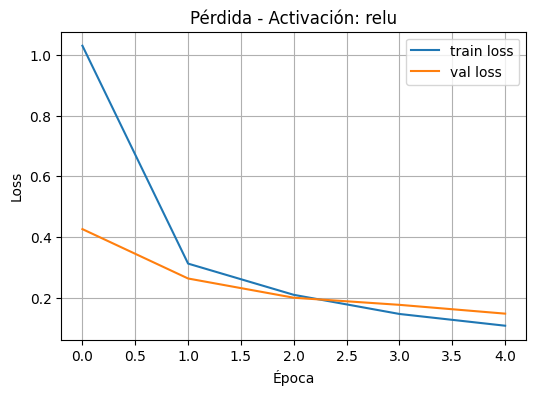

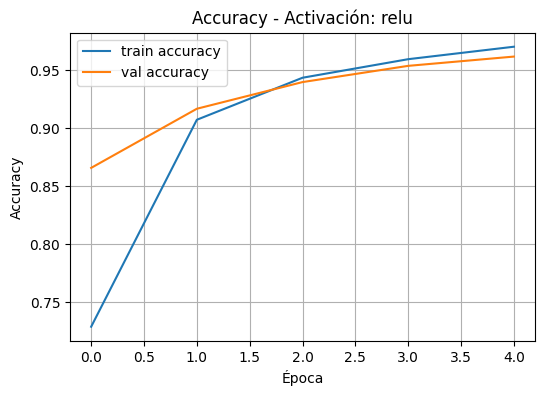

In [38]:
# 7) Curvas de entrenamiento
def plot_curve(hist, key, title):
    plt.figure(figsize=(6,4))
    plt.plot(hist.history[key], label=f"train {key}")
    plt.plot(hist.history[f"val_{key}"], label=f"val {key}")
    plt.title(title); plt.xlabel("Época"); plt.ylabel(key.capitalize()); plt.legend(); plt.grid(True)
    plt.show()

plot_curve(history, "loss", f"Pérdida - Activación: {ACTIVATION}")
plot_curve(history, "accuracy", f"Accuracy - Activación: {ACTIVATION}")

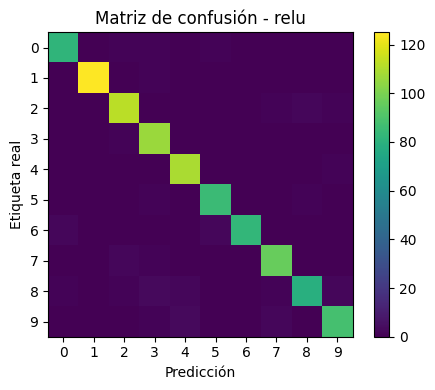


Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9647    0.9647    0.9647        85
           1     1.0000    0.9921    0.9960       126
           2     0.9573    0.9655    0.9614       116
           3     0.9298    0.9907    0.9593       107
           4     0.9561    0.9909    0.9732       110
           5     0.9659    0.9770    0.9714        87
           6     1.0000    0.9540    0.9765        87
           7     0.9600    0.9697    0.9648        99
           8     0.9634    0.8876    0.9240        89
           9     0.9565    0.9362    0.9462        94

    accuracy                         0.9650      1000
   macro avg     0.9654    0.9628    0.9638      1000
weighted avg     0.9654    0.9650    0.9649      1000



In [39]:
# 8) Matriz de confusión y reporte
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest")
plt.title(f"Matriz de confusión - {ACTIVATION}")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks); plt.yticks(tick_marks, tick_marks)
plt.xlabel("Predicción"); plt.ylabel("Etiqueta real")
plt.tight_layout()
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

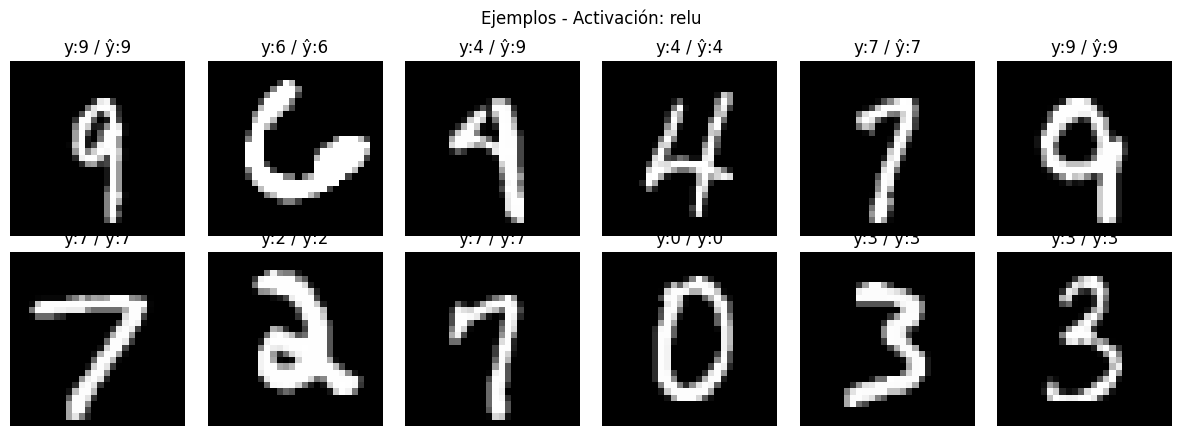

In [40]:
# 9) Vista rápida de algunas predicciones
def show_examples(images, labels, preds, n=12):
    idxs = np.random.choice(len(images), size=n, replace=False)
    cols = 6; rows = n // cols + int(n % cols != 0)
    plt.figure(figsize=(12, 2.2*rows))
    for i, idx in enumerate(idxs):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].squeeze(), cmap="gray")
        title = f"y:{labels[idx]} / ŷ:{preds[idx]}"
        plt.title(title); plt.axis("off")
    plt.suptitle(f"Ejemplos - Activación: {ACTIVATION}")
    plt.tight_layout(); plt.show()

show_examples(x_test, y_test, y_pred, n=12)